In [1]:
#  For sting e changes I made in python files

In [2]:
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
import pickle
from scipy.interpolate import UnivariateSpline
from constants import pdm_constants

In [3]:
# Parameters ---
config["general"]["detector"] = "IceCube"
config["general"]["year"] = 9
mass_grid = np.logspace(1, 4, 2) # np.logspace(1, 6, 10)
sv_grid = np.logspace(-24, -21, 2) # 10
angle = config['atmospheric showers']['theta angles']
b = Atm_Shower()
mass_id = 1
sv_id = 1

In [4]:
#aeff = Aeff()
#dete = Detector(aeff)

In [5]:
p = PDM()

Loading Effective Area


100%|██████████| 91/91 [04:17<00:00,  2.83s/it]
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:344: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:345: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
  0%|          | 0/1 [00:00<?, ?it/s]/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/limit_calc.py:81: RuntimeWarning: invalid value encountered in true_divide
  np.nan_to_num(x /
100%|██████████| 1/1 [00:00<00:00, 330.73it/s]


In [6]:
# Flux, Counts, effective area loading
ice_flux = {}
for m in mass_grid:
    for sv in sv_grid:
        ice_flux[m,sv] = pickle.load(open("/home/kruteesh/Desktop/dm_data_server/18_11/data/signal_flux/extra_%.1e_%.1e.pkl"%(m,sv),"rb"))
signal_m = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/18_11/data/limits_signal_IceCube.pkl','rb'))
background_po = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/background_pone.pkl','rb'))
eff_area = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/eff_area_ice.pkl','rb')) 
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/18_11/data/background_ice.pkl','rb'))
back = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/background_ice.pkl','rb'))


In [7]:
# Limits data Loading 
limits = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/limits_results_IceCube.pkl','rb'))
cl_lit = np.loadtxt('/home/kruteesh/Desktop/DM_nu_simulation_P-One/Literature/limits_Ice.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
m_1e4 = np.loadtxt("../data/m_1e4.csv",delimiter=",")
m_1e4 = (m_1e4[m_1e4[:, 0].argsort()])
m_1e2 = np.loadtxt("../data/m_1e2.csv",delimiter=",")
m_1e2 = (m_1e2[m_1e2[:, 0].argsort()])
m_1e6 = np.loadtxt("../data/m_1e6.csv",delimiter=",")
m_1e6 = (m_1e6[m_1e6[:, 0].argsort()])

Text(0.5, 0, '$m_{x}$ [GeV]')

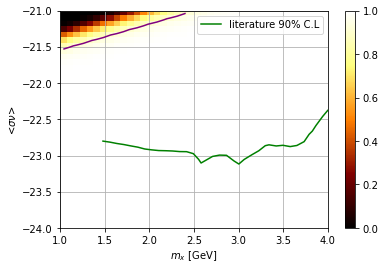

In [8]:
# Limits Comparision ----
plt.imshow( limits, extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                              min(np.log10(sv_grid)), max(np.log10(sv_grid))),
                     origin='lower', aspect='auto',cmap=plt.cm.afmhot)

plt.colorbar()
plt.contour(limits, levels=[0.9], colors='purple',
                origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))))  #  origin!!!!!!!!!!
plt.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')

plt.legend()
plt.grid()
plt.ylabel(r'<$\sigma \nu$>')
plt.xlabel(r'$m_{x}$ [GeV]')

Text(0, 0.5, 'Effective Area [$cm^2$]')

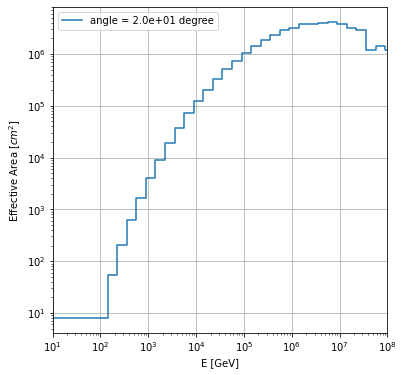

In [9]:
# Effective area comparision ----
plt.figure(figsize=(6,6))
plt.step(b.egrid,eff_area[angle[20]],label=r'angle = %.1e degree' %angle[20])
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e8)
#plt.ylim(1,1e7)
plt.legend()
plt.grid()
plt.xlabel('E [GeV]')
plt.ylabel(r'Effective Area [$cm^2$]')

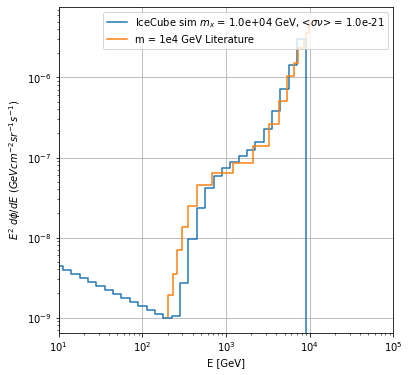

In [10]:
flux = ice_flux[mass_grid[1], sv_grid[0]]
plt.figure(figsize=(6,6))
plt.step(b.egrid,(flux*b.egrid**2),label=r'IceCube sim $m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
plt.step(m_1e4[:, 0], m_1e4[:, 1],"-",label="m = 1e4 GeV Literature")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e5)
#plt.ylim(1e1,1e7)
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel(r'$E^2$ $d\phi/dE$ $(GeV cm^{-2} sr^{-1} s^{-1})$')
plt.grid()

In [11]:
mass_id, sv_id = (1,0)
# summing effective areas over all thetas [0,90]
total_eff=np.zeros_like(eff_area[0])
for theta in angle:
    total_eff=total_eff+eff_area[theta]
# Simulated Flux  
flux = ice_flux[mass_grid[mass_id], sv_grid[sv_id]]

In [12]:
back["numu"]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.75163068e+00, 3.26474721e+02, 6.52727951e+02,
       1.79656188e+03, 3.23167330e+03, 5.67031238e+03, 8.35468545e+03,
       1.13129952e+04, 1.46548403e+04, 1.80789003e+04, 2.67583533e+04,
       3.77926980e+04, 8.82071525e+04, 1.72728345e+05, 4.17453349e+05,
       7.96513526e+05, 1.39706708e+06, 1.75177692e+06, 1.74949453e+06,
       1.32980401e+06, 7.15336499e+05, 3.69272042e+05, 1.20559192e+05,
       6.02095527e+04, 2.29829102e+04, 1.23956716e+04, 6.27307882e+03,
       3.62791490e+03, 1.99596566e+03, 1.18891463e+03, 6.55765935e+02,
       3.90522166e+02, 2.13981791e+02, 1.30946847e+02, 7.26357388e+01,
      

Text(0, 0.5, '# counts')

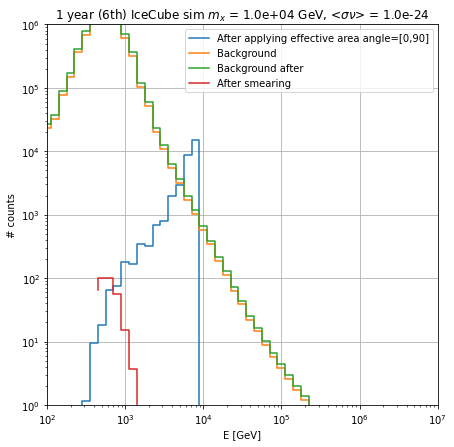

In [15]:
# Counts comparision ---------
plt.figure(figsize=(7,7))
plt.title(r'1 year (6th) IceCube sim $m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
plt.step(b.egrid,flux*b.ewidth*total_eff*3600*24*365,label=r"After applying effective area angle=[0,90]")
plt.step(b.egrid,background_ic['numu'],label='Background')
plt.step(b.egrid,back['numu'],label='Background after')
plt.step(b.egrid[-len(signal_m[mass_id][sv_id]):],signal_m[mass_id][sv_id]*1e4,label="After smearing")
#plt.step(b.egrid[-len(p.signal[mass_id][sv_id]):],p.signal[mass_id][sv_id],label="POne")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2,1e7)
plt.ylim(1,1e6)
plt.grid()
plt.legend()
plt.xlabel('E [GeV]')
plt.ylabel(r'# counts')

In [ ]:
eff_counts = np.sum(flux*b.ewidth*total_eff*60*60*24*365) # 
smea_counts = np.sum(signal_m[mass_id][sv_id])

In [ ]:
eff_counts/smea_counts

918234.6381122026

In [ ]:
smea_counts

0.03396409792606826

In [ ]:
eff_counts

31187.011167950703

In [ ]:
smea = dete.smearing_function(5, 20, 9)

NameError: name 'dete' is not defined

In [ ]:
tmp_counts = np.trapz(smea[1],smea[0])

In [ ]:
smea_array = np.array([dete.smearing_function(e, 20, 9) for e in np.linspace(0, 6, 100)])

In [ ]:
total_smea_counts = np.array([np.trapz(elem[1],elem[0])for elem in smea_array ])

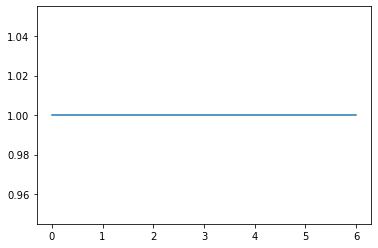

In [ ]:
plt.plot(np.linspace(0,6,100),total_smea_counts)

In [ ]:
for theta in np.linspace(0,15,20):
    check_angle = theta
    tmp_1 = []
    tmp_2 = []
    log_egrid = np.linspace(0,6,100)
    i = 0
    for j,id_check in enumerate(range(len(log_egrid))):
        smearing_e, smearing = dete.smearing_function(
                                                    log_egrid[
                                                        id_check],
                                                    check_angle,
                                                    9)
        # print(len(at_counts_unsm[theta]), len(smearing))
        if len(smearing) < 3:
            continue
        local_sp = (UnivariateSpline(smearing_e,
                                    (smearing),
                                    k=1, s=0,
                                    ext=1)(np.log10(b.egrid)))
        local_sp = np.trapz(local_sp, x= np.log10(b.egrid))
        i=j
        tmp_1.append(1*local_sp)
    tmp_bkgrd = np.sum(tmp_1, axis=0)



TypeError: object of type 'numpy.float64' has no len()

In [ ]:
a = []
b = [[6,7,8,9,10],[21,22,23,24,25]]
c = [[11,12,13,14,15],[31,32,33,34,35]]


In [ ]:
a.append((np.array(b) + np.array(c)))
a

[array([[17, 19, 21, 23, 25],
        [52, 54, 56, 58, 60]])]

In [ ]:
np.sum(tmp_bkgrd)/i


In [ ]:
plt.plot(np.log10(b.egrid),tmp_bkgrd)